Important Note: All your code has to be submitted in one Jupyter notebook. For every checkpoint, keep writing code in one well-commented Jupyter notebook which you can submit at the end.


In [1162]:
#import Libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Checkpoint 1: Data Cleaning 1

####  Load the companies and rounds data (provided on the previous page) into two data frames and name them companies and rounds2 respectively. 



In [1163]:
rounds2 = pd.read_csv('./Data/rounds2.csv',encoding='ISO-8859-1')
rounds2.head(2)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


In [1164]:
companies = pd.read_csv('./Data/companies.csv',encoding='ISO-8859-1')
companies.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


### Cleaning

In [1165]:
rounds2.company_permalink = rounds2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies.permalink = companies.permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies.name = companies.name.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
rounds2['UniqueID'] = rounds2['company_permalink'].apply(lambda x : (x.strip().lower()))
companies['UniqueID'] = companies['permalink'].apply(lambda x : x.strip().lower() if type(x) == str else x)


In [1166]:
companies.tail(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,UniqueID
66366,/Organization/Asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,/organization/asys-2
66367,/Organization/Novatiff-Reklam-Ve-TanTM-Hizmetl...,novatiff Reklam ve Tantm Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN,/organization/novatiff-reklam-ve-tantm-hizmetl...


In [1167]:
rounds2.tail(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,UniqueID
114947,/ORGANIZATION/ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0,/organization/asys-2
114948,/organization/novatiff-reklam-ve-tantm-hizmetl...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0,/organization/novatiff-reklam-ve-tantm-hizmetl...


**1.How many unique companies are present in rounds2?**

In [1168]:
num_unique_companies_round_2 = len(pd.unique(rounds2['UniqueID']))
print("No.of.  unique companies in round2:",  num_unique_companies_round_2)

No.of.  unique companies in round2: 66368


**2.How many unique companies are present in companies?**

In [1169]:
num_unique_companies = len(pd.unique(companies['UniqueID']))
print("No.of.  unique companies:",  num_unique_companies)

No.of.  unique companies: 66368


**3.In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column**

In [1170]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 11 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
UniqueID         66368 non-null object
dtypes: object(11)
memory usage: 5.6+ MB


 We need 66368 unique values and **status has repeating** categories so only passing candidate is **permalink**

**4.Are there any companies in the rounds2 file which are not  present in companies ?**

In [1171]:
set(rounds2['UniqueID']).difference(set(companies['UniqueID']))
print("As set len is 0 so both dfs have same companies")

As set len is 0 so both dfs have same companies


**5.Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?**

In [1172]:
master_frame = companies.merge(rounds2,how='left',left_on=['UniqueID'],right_on=['UniqueID'])


In [1173]:
len(master_frame.index)


114949

-----
## Checkpoint 1 Complete
-----

In [1174]:
master_frame = master_frame[['name','category_list','country_code','UniqueID','raised_amount_usd','funding_round_type']]

In [1175]:
##There are null values which is creating problem in checkpoint 2
##Cleaning again
print(master_frame.isnull().sum()/len(master_frame)*100)

name                   0.000870
category_list          2.966533
country_code           7.549435
UniqueID               0.000000
raised_amount_usd     17.390321
funding_round_type     0.000000
dtype: float64


In [1176]:
## Lets see if we can impute the null with mean
master_frame['raised_amount_usd'].describe()/1000000



count        0.094959
mean        10.426869
std        114.821248
min          0.000000
25%          0.322500
50%          1.680511
75%          7.000000
max      21271.935000
Name: raised_amount_usd, dtype: float64

In [1177]:
## As there is huge variance between 25% and 75% we need to drop such rows
master_frame = master_frame.dropna(subset=['raised_amount_usd'])



In [1178]:
master_frame = master_frame.dropna(subset=['country_code','category_list',])
print(master_frame.isnull().sum()/len(master_frame)*100)


name                  0.00113
category_list         0.00000
country_code          0.00000
UniqueID              0.00000
raised_amount_usd     0.00000
funding_round_type    0.00000
dtype: float64


## Checkpoint 2: Funding Type Analysis


Seed/angel funding refer to early stage startups whereas venture funding occurs after seed or angel stage/s and involves a relatively higher amount of investment.
**Spark Funds wants to choose one of these four investment types for each potential investment they will make.**

Considering the constraints of Spark Funds, you have to decide one funding type which is most suitable for them.
**Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) and report the answers in Table 2.1**
Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?

In [1179]:
master_frame = master_frame.loc[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed','private_equity']),:]
master_frame.head()

,name,category_list,country_code,UniqueID,raised_amount_usd,funding_round_type
0,#fame,Media,IND,/organization/-fame,10000000.0,venture
2,:Qounter,Application Platforms|Real Time|Social Network...,USA,/organization/-qounter,700000.0,seed
4,0-6.com,Curated Web,CHN,/organization/0-6-com,2000000.0,venture
7,Ondine Biomedical Inc.,Biotechnology,CAN,/organization/0ndine-biomedical-inc,43360.0,seed
8,Ondine Biomedical Inc.,Biotechnology,CAN,/organization/0ndine-biomedical-inc,719491.0,venture


In [1180]:
master_frame.groupby('funding_round_type').agg(['mean'])/1000000 #$ to million


,raised_amount_usd
,mean
funding_round_type,
angel,0.971574
private_equity,73.938486
seed,0.747794
venture,11.724223


In [1181]:
master_frame['raised_amount_million_usd'] = master_frame['raised_amount_usd']/1000000

<AxesSubplot:xlabel='raised_amount_million_usd', ylabel='funding_round_type'>

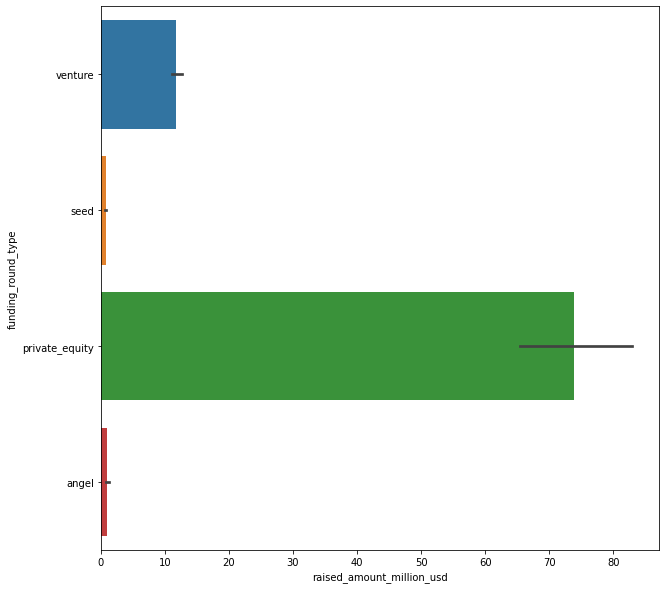

In [1182]:
plt.figure(figsize=(10,10))
sns.barplot(x="raised_amount_million_usd", y="funding_round_type", data=master_frame,estimator=np.mean,orient='h')

## Venture is most suitable as it lies in 5  to 15 million range

In [1183]:
#filter the data so it only contains the chosen investment type.
venture_df  = master_frame.loc[master_frame['funding_round_type']=='venture',['name','category_list','funding_round_type','country_code','raised_amount_usd','UniqueID']]


## Checkpoint 2 Complete
--------

---------
## Checkpoint 3: Country Analysis


Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.
 
Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)
For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [1184]:
top9 = venture_df.pivot_table(values = 'raised_amount_usd', index = 'country_code', aggfunc = 'sum')/1000000

In [1185]:
top9.head()

,raised_amount_usd
country_code,
ARE,342.617539
ARG,314.338819
ARM,26.517500
AUS,1319.028698
AUT,583.360681


In [1186]:
top9 = top9.sort_values(by = 'raised_amount_usd', ascending = False)
top9 = top9.iloc[:9, ]

In [1187]:
top9.head()

,raised_amount_usd
country_code,
USA,420068.029342
CHN,39338.918773
GBR,20072.813004
IND,14261.508718
CAN,9482.217668


- A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.                                     



### Top English speaking countries to invest in (with highest funding for chosen type)


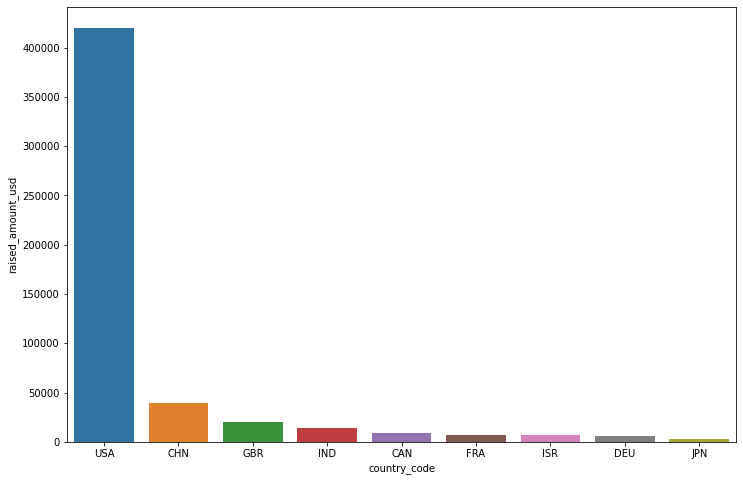

              raised_amount_usd
country_code                   
USA               420068.029342
CHN                39338.918773
GBR                20072.813004
IND                14261.508718
CAN                 9482.217668
FRA                 7226.851352
ISR                 6854.350477
DEU                 6306.921981
JPN                 3167.647127

 Top 3 english speaking countries in order are: USA, GBR, IND


In [1188]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top9.reset_index(),y='raised_amount_usd',x='country_code')
plt.show()
print(top9)
print("\n Top 3 english speaking countries in order are: USA, GBR, IND")

In [1189]:
venture_df = venture_df.loc[(venture_df['country_code'].isin(['USA','GBR','IND']))]

-----
## Checkpoint 3 Completed
-----

## Checkpoint 4: Sector Analysis 1


You discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.
1. Extract the primary sector of each category list from the category_list column
2. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [1190]:
venture_df.head(2)

,name,category_list,funding_round_type,country_code,raised_amount_usd,UniqueID
0,#fame,Media,venture,IND,10000000.0,/organization/-fame
10,H2O.ai,Analytics,venture,USA,20000000.0,/organization/0xdata


Also, for some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |). For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.

In [1191]:
venture_df['primary_sector'] = venture_df['category_list'].apply(lambda x:x.split('|')[0].lower())

In [1192]:
venture_df.head()

,name,category_list,funding_round_type,country_code,raised_amount_usd,UniqueID,primary_sector
0,#fame,Media,venture,IND,10000000.0,/organization/-fame,media
10,H2O.ai,Analytics,venture,USA,20000000.0,/organization/0xdata,analytics
11,H2O.ai,Analytics,venture,USA,1700000.0,/organization/0xdata,analytics
12,H2O.ai,Analytics,venture,USA,8900000.0,/organization/0xdata,analytics
22,1 Mainstream,Apps|Cable|Distribution|Software,venture,USA,5000000.0,/organization/1-mainstream,apps


### Checkpoint 4: Sector Analysis 1


In [1193]:
mapping_df = pd.read_csv('./Data/mapping.csv')
mapping_df = mapping_df.dropna()
mapping_df.category_list = mapping_df.category_list.replace({'0':'na'}, regex=True)
##this will change A0lytics to Analytics
##it will also change Enterprise 2.0  to Enterprise 2.na which is a bug... so fix it
mapping_df.category_list = mapping_df.category_list.replace({'2.na':'2.0'}, regex=True)
mapping_df.category_list = mapping_df.category_list.apply(lambda x:x.lower().strip())

**Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)**

In [1194]:
mapping_df['main_sector']=mapping_df.loc[:,'Automotive & Sports':'Social, Finance, Analytics, Advertising'].isin([1]).idxmax(1)


In [1195]:
mapping_df = mapping_df[['category_list','main_sector']]
mapping_df.head()

,category_list,main_sector
1,3d,Manufacturing
2,3d printing,Manufacturing
3,3d technology,Manufacturing
4,accounting,"Social, Finance, Analytics, Advertising"
5,active lifestyle,Health


In [1196]:
venture_df = venture_df.merge(mapping_df,how='left',left_on=['primary_sector'],right_on=['category_list'])



In [1197]:
venture_df.head()

,name,category_list_x,funding_round_type,country_code,raised_amount_usd,UniqueID,primary_sector,category_list_y,main_sector
0,#fame,Media,venture,IND,10000000.0,/organization/-fame,media,media,Entertainment
1,H2O.ai,Analytics,venture,USA,20000000.0,/organization/0xdata,analytics,analytics,"Social, Finance, Analytics, Advertising"
2,H2O.ai,Analytics,venture,USA,1700000.0,/organization/0xdata,analytics,analytics,"Social, Finance, Analytics, Advertising"
3,H2O.ai,Analytics,venture,USA,8900000.0,/organization/0xdata,analytics,analytics,"Social, Finance, Analytics, Advertising"
4,1 Mainstream,Apps|Cable|Distribution|Software,venture,USA,5000000.0,/organization/1-mainstream,apps,apps,"News, Search and Messaging"


### Number of primary sectors which have no mapping to main sector

In [1198]:
venture_df.isnull().sum(axis=0)


name                   0
category_list_x        0
funding_round_type     0
country_code           0
raised_amount_usd      0
UniqueID               0
primary_sector         0
category_list_y       11
main_sector           11
dtype: int64

In [1199]:
print(venture_df[venture_df.main_sector.isnull()].primary_sector)

7345                    natural gas uses
10162                 adaptive equipment
12375                             racing
12630                   specialty retail
14956    biotechnology and semiconductor
17882                  rapidly expanding
23816                     product search
29949                          greentech
30210                         retirement
30211                         retirement
35906                 adaptive equipment
Name: primary_sector, dtype: object


In [1200]:
## removing rows which have to mapping
print(venture_df.isnull().sum(axis=0))
venture_df = venture_df.dropna(subset=['main_sector',])
print(venture_df.isnull().sum(axis=0))




name                   0
category_list_x        0
funding_round_type     0
country_code           0
raised_amount_usd      0
UniqueID               0
primary_sector         0
category_list_y       11
main_sector           11
dtype: int64
name                  0
category_list_x       0
funding_round_type    0
country_code          0
raised_amount_usd     0
UniqueID              0
primary_sector        0
category_list_y       0
main_sector           0
dtype: int64


---
## Checkpoint 5: Sector Analysis 2
---

Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).


In [1201]:
venture_df.head()

,name,category_list_x,funding_round_type,country_code,raised_amount_usd,UniqueID,primary_sector,category_list_y,main_sector
0,#fame,Media,venture,IND,10000000.0,/organization/-fame,media,media,Entertainment
1,H2O.ai,Analytics,venture,USA,20000000.0,/organization/0xdata,analytics,analytics,"Social, Finance, Analytics, Advertising"
2,H2O.ai,Analytics,venture,USA,1700000.0,/organization/0xdata,analytics,analytics,"Social, Finance, Analytics, Advertising"
3,H2O.ai,Analytics,venture,USA,8900000.0,/organization/0xdata,analytics,analytics,"Social, Finance, Analytics, Advertising"
4,1 Mainstream,Apps|Cable|Distribution|Software,venture,USA,5000000.0,/organization/1-mainstream,apps,apps,"News, Search and Messaging"


### Country-Wise Sector Analysis


In [1202]:
D1 = venture_df.loc[venture_df.country_code=='USA' ,:]
D1 = D1.loc[(venture_df.raised_amount_usd >= 5000000) & (venture_df.raised_amount_usd <= 15000000),:]
D2 = venture_df.loc[venture_df.country_code=='GBR' ,:]
D2 = D2.loc[(venture_df.raised_amount_usd >= 5000000) & (venture_df.raised_amount_usd <= 15000000),:]
D3 = venture_df.loc[venture_df.country_code=='IND' ,:]
D3 = D3.loc[(venture_df.raised_amount_usd >= 5000000) & (venture_df.raised_amount_usd <= 15000000),:]




### Using the three data frames, you can calculate the total number of investments and the total amount of investments in each main sector for each of the three countries.

In [1203]:
##Function for Table 5_1 Analysis
def indepth_analysis(df, country_name):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df,y='main_sector',x='raised_amount_usd',estimator=np.sum,orient='h')
    plt.plot()
    top3 = df.pivot_table(values = 'country_code', index = 'main_sector', aggfunc = 'count').reset_index()
    top3.sort_values(by='country_code',ascending=False,inplace=True)
    top3 = top3[:3]
    top3 = top3.rename(columns={"country_code": "count"})
    plt.figure(figsize=(12, 8))
    sns.barplot(data=top3.reset_index(),y='main_sector',x='count',orient='h')
    plt.plot()
    
    top3_sect_name = df.groupby('main_sector').count().sort_values('UniqueID', ascending=False).head(3).index
    top3_sect_name_count = df.groupby('main_sector').count().sort_values('UniqueID', ascending=False).head(3)['UniqueID']

    print('Total number of investments: {}'.format(df.UniqueID.count()))
    print('Total amount of investments: {}'.format(df.raised_amount_usd.sum()/1000000))
    
    print('For {} Top 3 main Sectors are :'.format(country_name))
    print('----------')
    for i in range(0,3):
        print('{}.{} '.format(i+1,top3_sect_name[i],))
    print('----------')
    for i in range(0,3):
        print('{}. Number of investment in {} = {}'.format(i+1,top3_sect_name[i],top3_sect_name_count[i]))
    top_sector_company_name = df.loc[df.main_sector==top3_sect_name[0],].groupby('name').sum().sort_values('raised_amount_usd', ascending=False).head(1).reset_index()['name'][0]
    second_top_sector_company_name = df.loc[df.main_sector==top3_sect_name[1],].groupby('name').sum().sort_values('raised_amount_usd', ascending=False).head(1).reset_index()['name'][0]
    print('----------')
    print('{} company received the highest investment'.format(top_sector_company_name))
    print('{} company received the second highest investment'.format(second_top_sector_company_name))
    
    return df.loc[df['main_sector'].isin([top3_sect_name[0],top3_sect_name[1],top3_sect_name[2]])]





  

Total number of investments: 12063
Total amount of investments: 107757.097294
For USA Top 3 main Sectors are :
----------
1.Others 
2.Social, Finance, Analytics, Advertising 
3.Cleantech / Semiconductors 
----------
1. Number of investment in Others = 2950
2. Number of investment in Social, Finance, Analytics, Advertising = 2714
3. Number of investment in Cleantech / Semiconductors = 2350
----------
Virtustream company received the highest investment
SST Inc. (Formerly ShotSpotter) company received the second highest investment


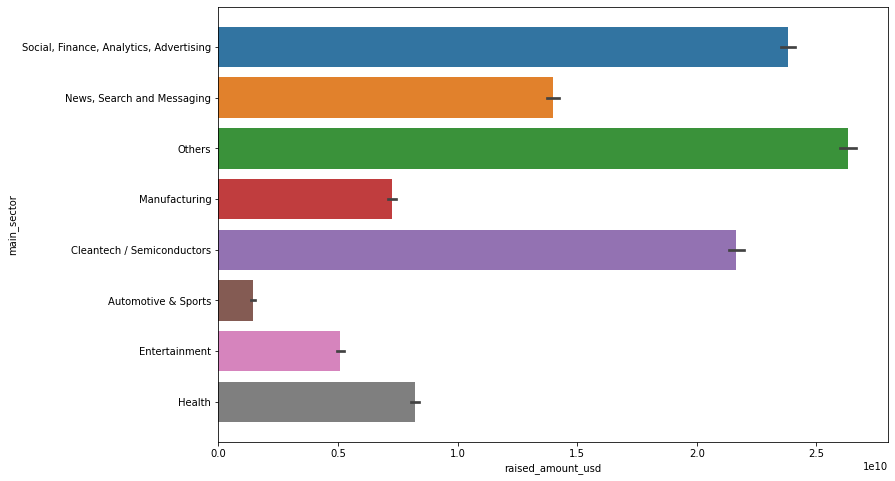

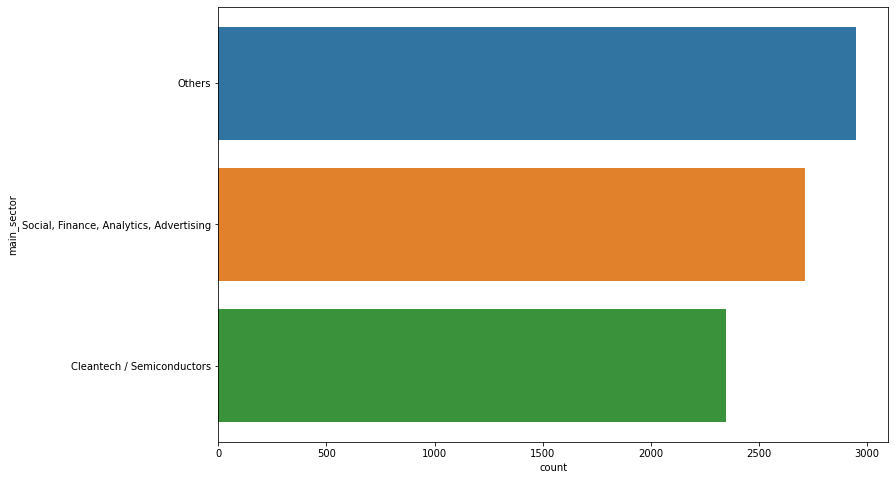

In [1204]:
top3_d1 = indepth_analysis(D1,'USA')


Total number of investments: 621
Total amount of investments: 5379.078691
For GBR Top 3 main Sectors are :
----------
1.Others 
2.Social, Finance, Analytics, Advertising 
3.Cleantech / Semiconductors 
----------
1. Number of investment in Others = 147
2. Number of investment in Social, Finance, Analytics, Advertising = 133
3. Number of investment in Cleantech / Semiconductors = 130
----------
Electric Cloud company received the highest investment
Celltick Technologies company received the second highest investment


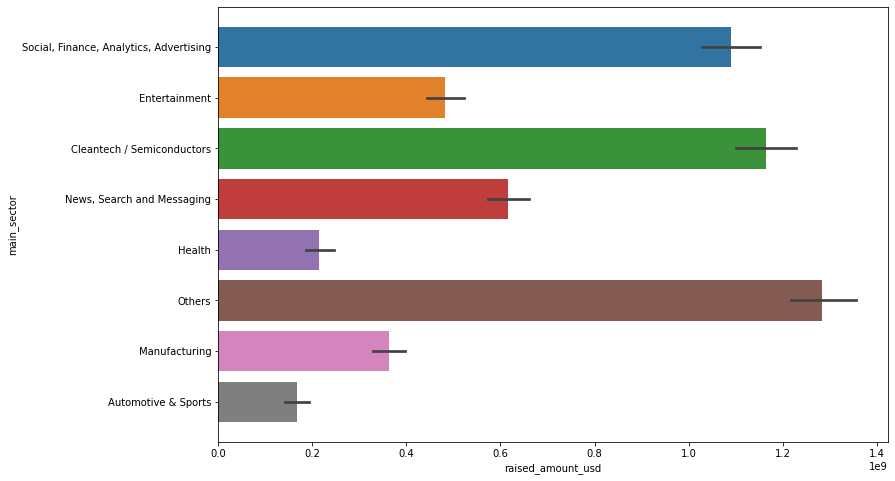

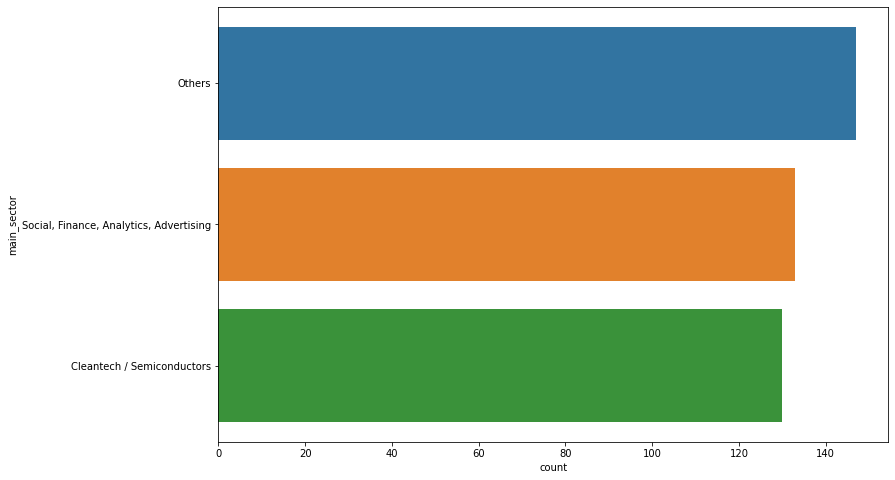

In [1205]:
top3_d2 = indepth_analysis(D2,'GBR')


Total number of investments: 328
Total amount of investments: 2949.543602
For IND Top 3 main Sectors are :
----------
1.Others 
2.Social, Finance, Analytics, Advertising 
3.News, Search and Messaging 
----------
1. Number of investment in Others = 110
2. Number of investment in Social, Finance, Analytics, Advertising = 60
3. Number of investment in News, Search and Messaging = 52
----------
FirstCry.com company received the highest investment
Manthan Systems company received the second highest investment


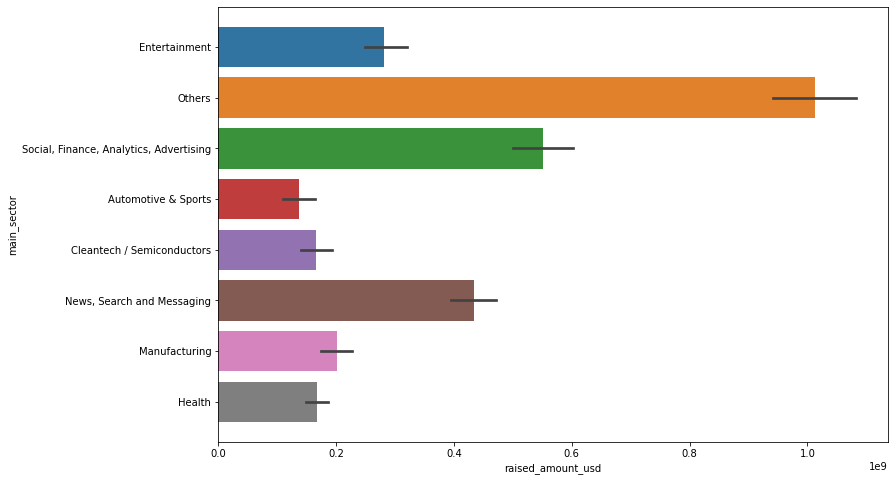

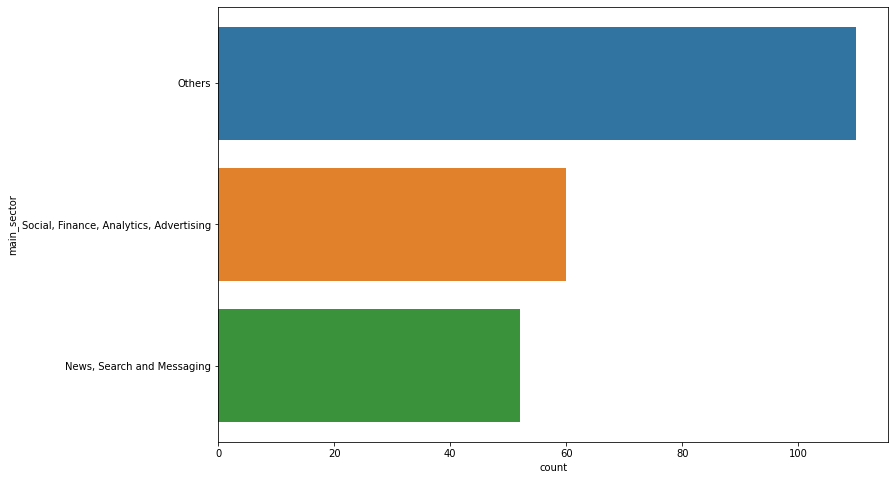

In [1206]:
top3_d3 = indepth_analysis(D3,'IND')

Table 5.1: Based on the analysis of the sectors, which main sectors and countries would you recommend Spark Funds to invest in? Present your conclusions in the presentation. The conclusions are subjective (i.e. there may be no ‘one right answer’), but it should be based on the basic strategy — invest in sectors where most investments are occurring. 

### As a final step, you have to present your findings to the CEO of Spark Funds. Specifically, she wants to see the following plots:
 
- A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   
- A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.                                     
- A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

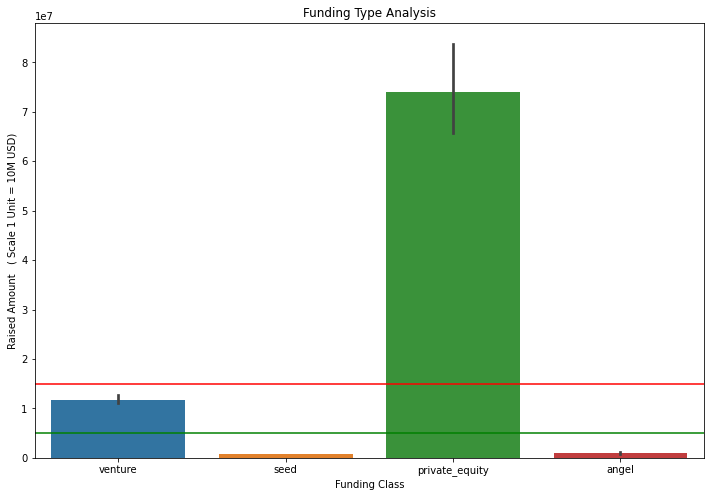

In [1207]:
plt.figure(figsize=(12,8))
b=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
b.set(xlabel='Funding Class', ylabel='Raised Amount   ( Scale 1 Unit = 10M USD)')
b.set_title('Funding Type Analysis')
plt.axhline(5000000, color='green')
plt.axhline(15000000, color='red')
plt.show()

In [1208]:
top9 = top9.reset_index()

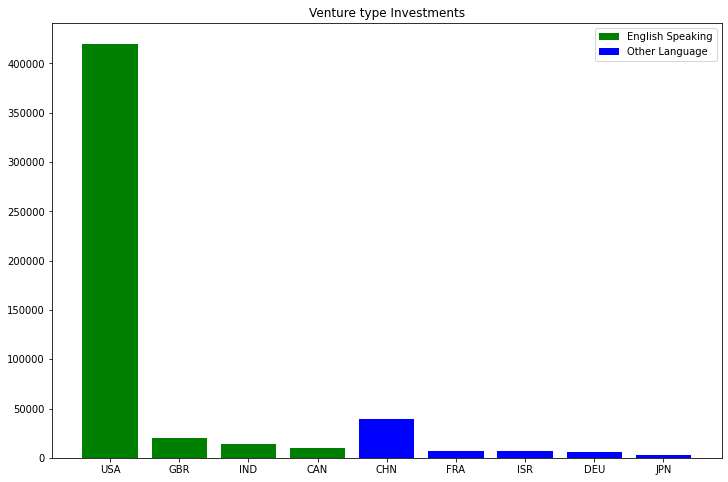

In [1212]:
plt.figure(figsize=(12, 8))
eng_c_list = ['USA','GBR','IND','CAN']
eng_countries = top9.loc[top9.country_code.isin(eng_c_list)].groupby('country_code')
eng_countries_amounts = pd.DataFrame(eng_countries['raised_amount_usd'].sum().sort_values(ascending = False))
non_eng_countries = top9.loc[~top9.country_code.isin(eng_c_list)].groupby('country_code')
non_eng_countries_amounts = pd.DataFrame(non_eng_countries['raised_amount_usd'].sum().sort_values(ascending = False))
plt.bar(eng_countries_amounts.index.values, round(eng_countries_amounts['raised_amount_usd']), color='g')
plt.bar(non_eng_countries_amounts.index.values, round(non_eng_countries_amounts['raised_amount_usd']), color='b')
plt.legend([('English Speaking'), ('Other Language')])
plt.title('Venture type Investments')
plt.show()

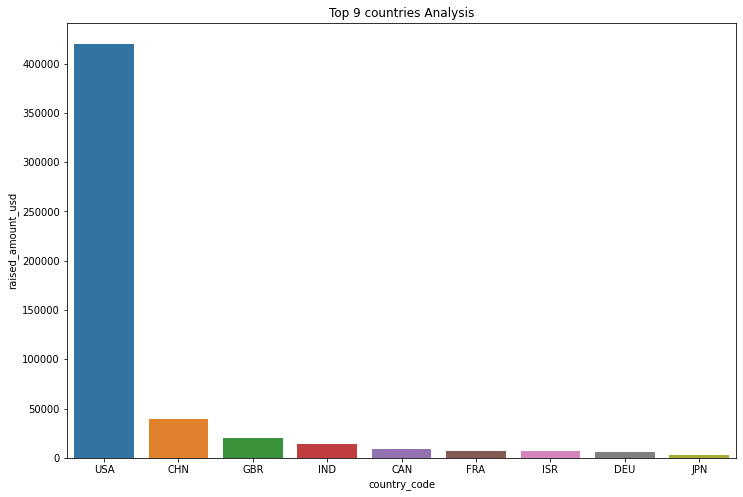

  country_code  raised_amount_usd
0          USA      420068.029342
1          CHN       39338.918773
2          GBR       20072.813004
3          IND       14261.508718
4          CAN        9482.217668
5          FRA        7226.851352
6          ISR        6854.350477
7          DEU        6306.921981
8          JPN        3167.647127

 Top 3 english speaking countries in order are: USA, GBR, IND


In [1213]:


plt.figure(figsize=(12, 8))
b=sns.barplot(data=top9,y='raised_amount_usd',x='country_code')
b.set_title('Top 9 countries Analysis')
plt.show()
print(top9)
print("\n Top 3 english speaking countries in order are: USA, GBR, IND")

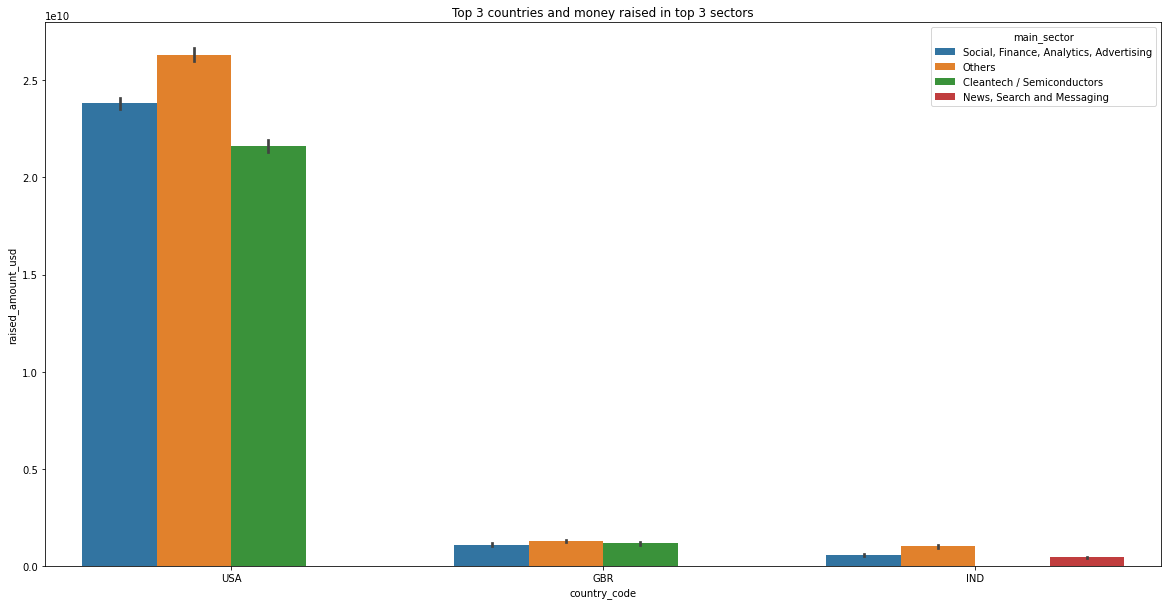

In [1214]:
frames = [top3_d1, top3_d2, top3_d3]
result = pd.concat(frames)
plt.figure(figsize=(20, 10))
p=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=result, estimator=np.sum,orient='v')
p.set_title('Top 3 countries and money raised in top 3 sectors')
plt.show()